In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CapstoneProject1/PlayStoreData.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Lets us start with the process of cleaning data. As we can see there are various columns with null values, with 'Rating' column having more than 500+ null values, 'Type' has 1 null, 'Content Rating' has 1 null, 'Current Ver' has 8 null and 'Android Ver' has 3 null values.

 Rating values with null specifies that it has not been rated on the Play Store. So we need not get rid of it. We need to sort out the null values in Type column.

In [ ]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
#locating the record with Type value as null
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
#Dropping the record with null value
df = df.drop([9148])

In [ ]:
#locating the record with Type 0
df[df.Type == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#dropping the record
df = df.drop([10472])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


As we can, Reviews column type is object. For easier calculation, it should be changed to numeric type

In [ ]:
#changing the datatype to numeric
df.Reviews = df.Reviews.apply(pd.to_numeric)

The Installs column is of object type. To convert it to numeric, we need to get rid of '+' and ',' signs and convert it to integer type

In [ ]:
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace(',','')
df.Installs = df.Installs.astype(int)

Also the Last updated column isn't it proper data type. Convert it to the date time

In [ ]:
#converting it to date time
df['Last Updated'] = df['Last Updated'].apply(pd.to_datetime)

The Size column is of object type again. For easier calculation, we need to get rid of string elements and convert to numeric data type.

In [ ]:
#replacing M and k with proper exponential format
df.Size = df.Size.str.replace('M', 'e6')
df.Size = df.Size.str.replace('k', 'e3')

We aslo have to replace 'varies with device' with null values

In [ ]:
df.Size = df.Size.replace('Varies with device', np.nan)

In [ ]:
df.Size = df.Size.astype(float)

Now almost the data has been cleaned. If further data erros comes out, we will clean as on the go. Let's start with analysis now.

11. **Category with most number of paid apps**

In [ ]:
df[df['Type'] == 'Paid'].groupby(['Category'])['App'].count().sort_values(ascending=False).reset_index()

,Category,App
0,FAMILY,191
1,MEDICAL,109
2,GAME,83
3,PERSONALIZATION,83
4,TOOLS,78
5,BOOKS_AND_REFERENCE,28
6,PRODUCTIVITY,28
7,COMMUNICATION,27
8,SPORTS,24
9,PHOTOGRAPHY,22


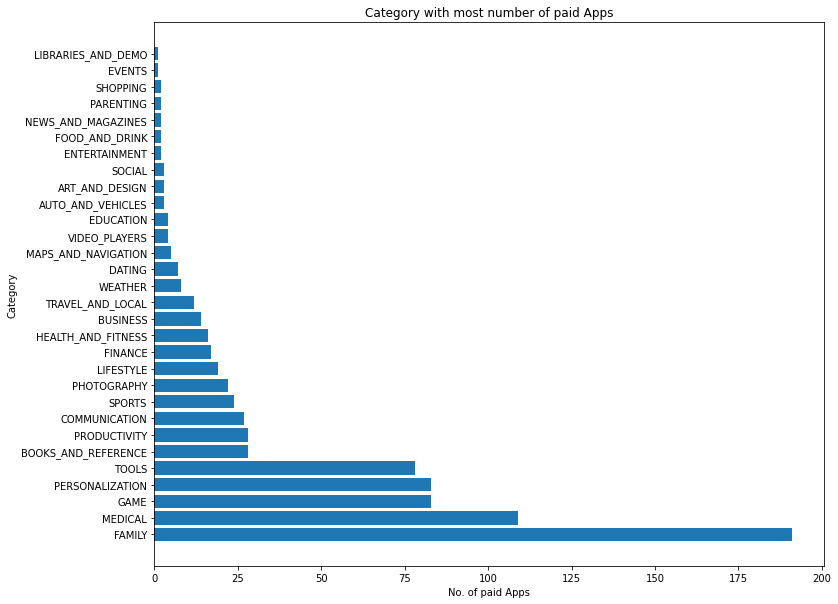

In [ ]:
df_paid = df[df['Type'] == 'Paid'].groupby(['Category'])['App'].count().sort_values(ascending=False).reset_index()

fig = plt.figure(figsize =(12,10))
plt.barh(df_paid.Category,df_paid.App)
plt.xlabel('No. of paid Apps')
plt.ylabel('Category')
plt.title('Category with most number of paid Apps')
plt.show()

12. **Comparison of size of app and number of installs**

In [ ]:
df.groupby(['Size'])['Installs'].sum().reset_index()

,Size,Installs
0,8500.0,50000
1,11000.0,1000000
2,14000.0,1000
3,17000.0,101000
4,18000.0,5100
...,...,...
454,96000000.0,536810510
455,97000000.0,1062711000
456,98000000.0,428152110
457,99000000.0,835660050


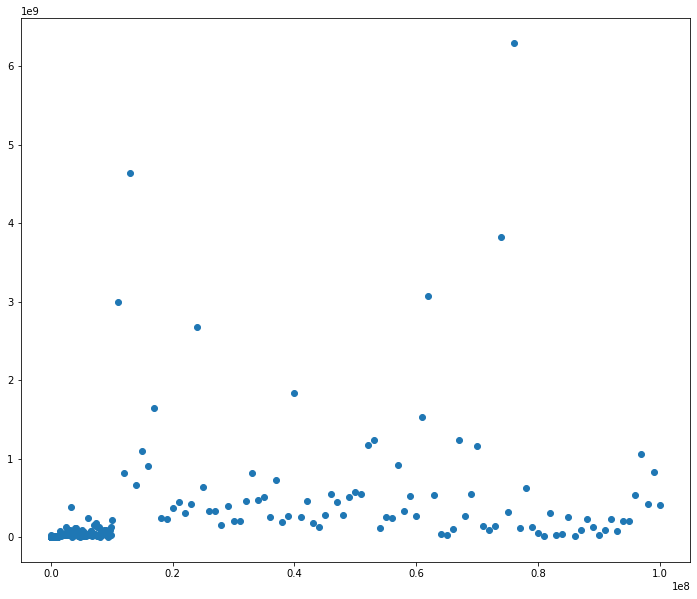

In [ ]:
df_size_vs_install = df.groupby(['Size'])['Installs'].sum().reset_index()

fig = plt.figure(figsize =(12,10))
plt.scatter(df_size_vs_install.Size, df_size_vs_install.Installs)
plt.show()

13. **Most downloaded genres in each category**

In [ ]:
df_group = df[['Category','Genres','Installs']]

In [ ]:
df_group.groupby(['Category','Genres']).sum()

Installs
Category          Genres                                           
ART_AND_DESIGN    Art & Design                            122528100
                  Art & Design;Action & Adventure            100000
                  Art & Design;Creativity                   1210000
                  Art & Design;Pretend Play                  500000
AUTO_AND_VEHICLES Auto & Vehicles                          53130211
...                                                             ...
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure          100000
VIDEO_PLAYERS     Video Players & Editors                6207002720
                  Video Players & Editors;Creativity        5000000
                  Video Players & Editors;Music & Video    10000000
WEATHER           Weather                                 426100520

[149 rows x 1 columns]